<a href="https://colab.research.google.com/github/wmg0034/Studies/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list -v | grep sci

datascience                        0.17.6              /usr/local/lib/python3.11/dist-packages uv
scikit-image                       0.25.2              /usr/local/lib/python3.11/dist-packages uv
scikit-learn                       1.6.1               /usr/local/lib/python3.11/dist-packages uv
scipy                              1.13.1              /usr/local/lib/python3.11/dist-packages uv


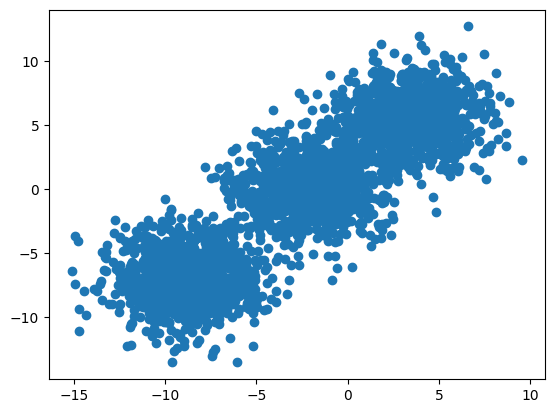

In [ ]:
# prompt:  Pick a random number k between 1 and 5. Use that number to generate a two-dimensional data set with features x and y with k clusters. The variables x and y should be continuous.

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pick a random number k between 1 and 5
k = 3

# Generate a two-dimensional data set with k clusters
n_samples = 1000  # Number of samples per cluster
data = []
for i in range(k):
    # Generate random cluster centers
    center_x = random.uniform(-10, 10)
    center_y = random.uniform(-10, 10)

    # Generate data points around the cluster center
    for j in range(n_samples):
        x = center_x + random.gauss(0, 2)  # Add Gaussian noise
        y = center_y + random.gauss(0, 2)
        data.append([x, y])

# Convert to NumPy array
data = np.array(data)
plt.scatter(data[:,0], data[:,1])


In [ ]:
k=3
threshold = 0.05

def initialize_centroids():
  centroids = []
  index = np.random.choice(data.shape[0], 3, replace=False)

  for i in range(k):
    centroids.append(data[index[i]])

  return centroids

def assign_clusters(data, centroids):
  cluster_assignment = np.zeros(len(data))

  for i, point in enumerate(data):
    dist=[]

    for centroid in centroids:
      diff = centroid - point
      dist.append( np.dot(diff, diff) )

    for j, d in enumerate(dist):
      if d == min(dist):
        cluster_assignment[i] = j

  return cluster_assignment

def update_centroids(data, cluster_assignments):
  new_centroids = []

  for i in range(k):
    numerator     = np.zeros(2)
    denominator   = 0
    for j, point in enumerate(data):
      if cluster_assignments[j] == i:
        numerator   += point
        denominator += 1

    new_centroids.append( numerator / denominator )

  return new_centroids

def check_convergence(old_centroids, new_centroids):
  dist = 0
  for i in range(len(old_centroids)):
    diff = old_centroids[i] - new_centroids[i]
    dist += np.dot(diff, diff)

  if dist < threshold:
    return True
  else:
    return False


def k_means(data):

  centroids = initialize_centroids()

  cluster_assignments = assign_clusters(data, centroids)

  converged = False

  iterations = 0

  while not converged:
    old_centroids       = centroids
    centroids           = update_centroids(data, cluster_assignments)
    converged           = check_convergence(old_centroids, centroids)
    cluster_assignments = assign_clusters(data, centroids)
    iterations+=1
    print(iterations)

  plt.scatter(x=data[:,0], y=data[:,1], c=cluster_assignments)


  return


1
2
3
4
5
6
7


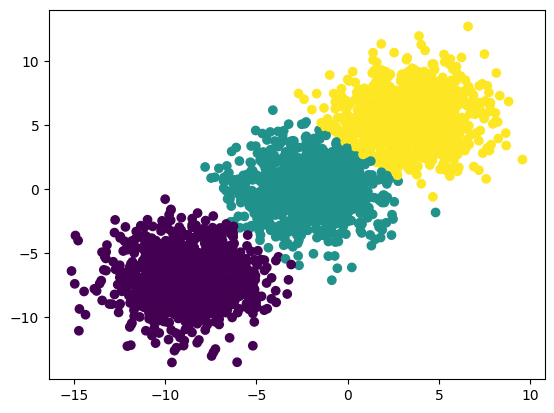

In [ ]:
k_means(data)